# Module 11: Machine learning - Examples


## ... first something familiar

### Linear Model

- using a linear function based on input features
- general form:
    
$Y = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b$

with w: weight or slope and b: intercept

In [13]:
#%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.model_selection import train_test_split

**...from the exercise:**

In [2]:
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis

data = pd.read_table('temp_falun.dat',  index_col = 0,  parse_dates = True)

#Correlation between Falun and both Gävle and Knon
# Distances
dist_fg = 82
dist_fk = 110

#Inverse distance weighting method
t_gk = ( (1./dist_fg)**2 )/( (1./dist_fg)**2 + (1/dist_fk)**2)*data['T_Gavle'] + ((1./dist_fk)**2)/((1./dist_fg)**2 + (1./dist_fk)**2)*data['T_Knon']
data['T_Gavle_Knon'] = t_gk

#For Falun and Gävle-Knon
fgk = smf.ols( formula  = 'T_Falun ~ T_Gavle_Knon', data = data).fit()

# Constants for the model:
alpha_fgk = fgk.params[0]   # Intercept
slope_fgk = fgk.params[1]   # T_Gavle_Knon
r2_fgk = fgk.rsquared

print('Model for Falun and Gavle-Knon: R2 = %.2f, alpha = %.4f and beta = %.4f'%(r2_fgk,alpha_fgk,slope_fgk))

estimated_fgk  = alpha_fgk + slope_fgk*data['T_Gavle_Knon']

Model for Falun and Gavle-Knon: R2 = 0.99, alpha = 0.1850 and beta = 0.9176


**...with a LinearRegression model from sklearn**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

data_nona = data.dropna()

y = data_nona.iloc[:,0]
X = data_nona.iloc[:,1:3]

lr = LinearRegression().fit(X, y)

print(lr.score(X, y))
print(lr.coef_)

0.986558243987
[ 0.57869414  0.33802657]


In [9]:
pre = np.array(data.iloc[21:,1:3])
print(pre)

d = {'ml': lr.predict(pre), 'idw': np.array(estimated_fgk[21:30])}
d = pd.DataFrame(data=d)
print(d.round(2))

[[  0.1  -1.1]
 [ -6.2  -5.4]
 [  0.5  -1.9]
 [ -1.9  -3.7]
 [ -6.4 -10.7]
 [ -7.6 -14.9]
 [  0.9  -5.8]
 [  0.5 -10. ]
 [ -1.2 -14.2]]
    idw    ml
0 -0.12 -0.11
1 -5.24 -5.21
2 -0.14 -0.15
3 -2.15 -2.15
4 -7.10 -7.12
5 -9.18 -9.23
6 -1.19 -1.23
7 -2.80 -2.89
8 -5.18 -5.29


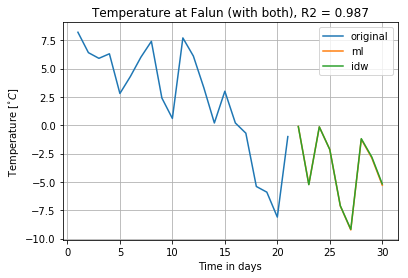

In [10]:
plt.plot(data.index, data['T_Falun'], label='original')
plt.plot([22,23,24,25,26,27,28,29,30],lr.predict(pre), label = 'ml')
plt.plot(estimated_fgk[21:30], label = 'idw')
plt.grid()
plt.xlabel('Time in days')
plt.ylabel('Temperature [$ ^{\circ}C $]')
plt.title('Temperature at Falun (with both), R2 = %.3f'%(r2_fgk))
plt.legend()

### Principle Component Analysis (PCA)

                            LE     T_air     P_air    RH_air  wind_speed  \
2015-06-01 08:30:00  14.214441  2.325161  1016.879  80.66074    4.772366   
2015-06-01 09:00:00  19.277794  2.337333  1016.794  81.91886    5.305324   
2015-06-01 09:30:00  15.617140  2.172278  1016.808  82.21066    6.061701   
2015-06-01 10:00:00  13.875763  1.998183  1016.796  81.75561    6.341284   
2015-06-01 10:30:00  20.214911  2.332133  1016.831  80.23505    6.026446   

                       wind_dir        Enet  ground_heat_flux  
2015-06-01 08:30:00  107.143311  348.956594          13.66815  
2015-06-01 09:00:00  105.781836  351.893543          15.08879  
2015-06-01 09:30:00  104.992899  411.856762          16.15566  
2015-06-01 10:00:00  104.451852  304.556982          16.54310  
2015-06-01 10:30:00  106.673256  385.062730          16.01460  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55733a438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd556fa7780>], dtype=object)

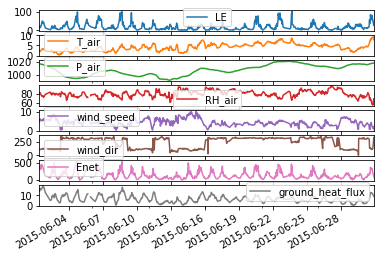

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df = pd.read_csv('ET_Adv.csv',index_col=0,parse_dates=True)

print(df.head())
df.plot(subplots=True)

In [11]:
# applying a PCA

df_clean=df.dropna()
df_clean['hour']=df_clean.index.hour

X = scale(df_clean.iloc[:,1:])
y = scale(df_clean.iloc[:,0])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2'],
                           index=df_clean.index)

components = pd.DataFrame(pca.components_, 
                          columns=df_clean.iloc[:,1:].columns, 
                          index=['principal component 1', 'principal component 2'])

print(components)

                          T_air     P_air    RH_air  wind_speed  wind_dir  \
principal component 1  0.489040  0.273170 -0.297455   -0.144341  0.217504   
principal component 2 -0.197211 -0.349016 -0.168533    0.578141 -0.508809   

                           Enet  ground_heat_flux      hour  
principal component 1  0.461911          0.481382  0.290700  
principal component 2  0.307402          0.260219  0.235689  


/home/sven/programmes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## A little bit about general coding style

In [12]:
# data is split in X and y
X = scale(df_clean.iloc[:,1:]) # holds all features
y = scale(df_clean.iloc[:,0]) # holds the target

# the dataset is also devided in training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # shuffle = False, test_size =, (0,1), train_size =

## Machine learning examples

### meet the data:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
#iris
#print(iris.feature_names)
#print(iris.data[0:10])
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
# put the data into a pandas dataframe 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()
#pd.scatter_matrix(iris_df, alpha=0.2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# split the dataset in training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

<IPython.core.display.Javascript object>


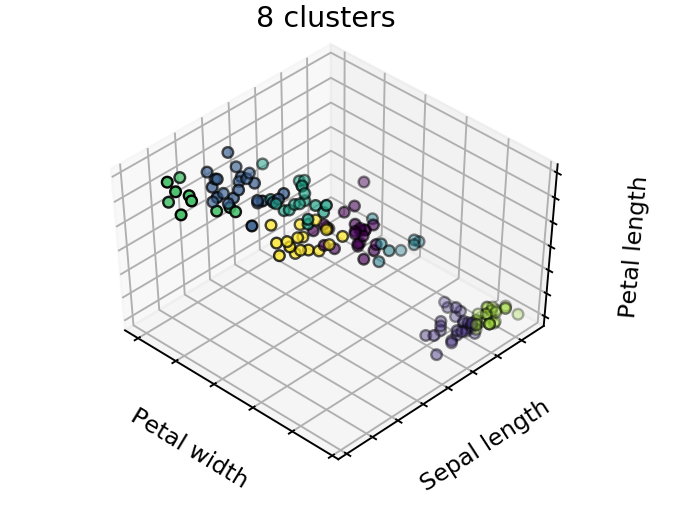

In [6]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(iris.data[iris.target == label, 3].mean(),
              iris.data[iris.target == label, 0].mean(),
              iris.data[iris.target == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y_ = np.choose(iris.target, [1, 2, 0]).astype(np.float)
ax.scatter(iris.data[:, 3], iris.data[:, 0], iris.data[:, 2], c=y_, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Unsupervised ML

### Clustering

- k-means clustering
    - Tries to find cluster center representing certain areas of the dataset
    - Altering between two steps:
        - Assigning each data point to a cluster center
        - Setting the cluster centers to the mean of the assigned data points
        - Finished when no change in the assignment of instances to cluster
            
        - Parameter: number of clusters
        - Problem: only fairly simple shapes can be classified. Assumption of equal cluster diameter.


- agglomerative clustering
    - start with a cluster for each point
    
    
- density-based spatial clustering of applications with noise (DBSCAN)
    - how ?


In [7]:
from sklearn.cluster import KMeans

np.random.seed(5) # set random state to get repeatedly the same randomness

X = iris.data
y = iris.target

km8 = KMeans(n_clusters=8).fit(X)
km3 = KMeans(n_clusters=3).fit(X)
km_bad = KMeans(n_clusters=3, n_init=1, init='random').fit(X) #max_iter

k_means_iris_8
k_means_iris_3


<IPython.core.display.Javascript object>


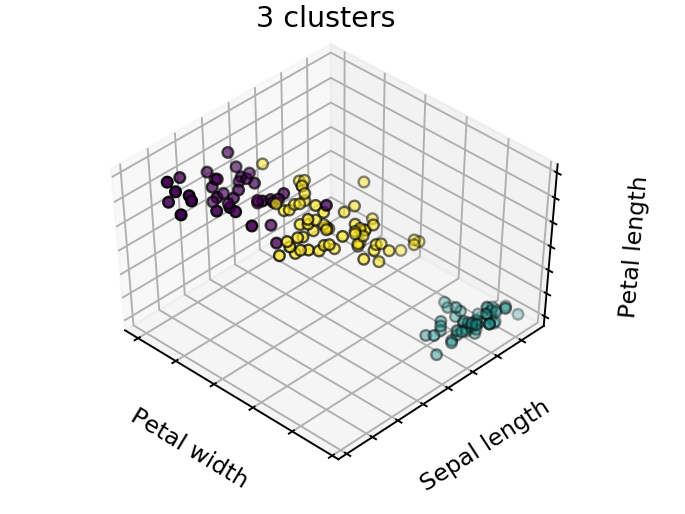

k_means_iris_bad_init


<IPython.core.display.Javascript object>


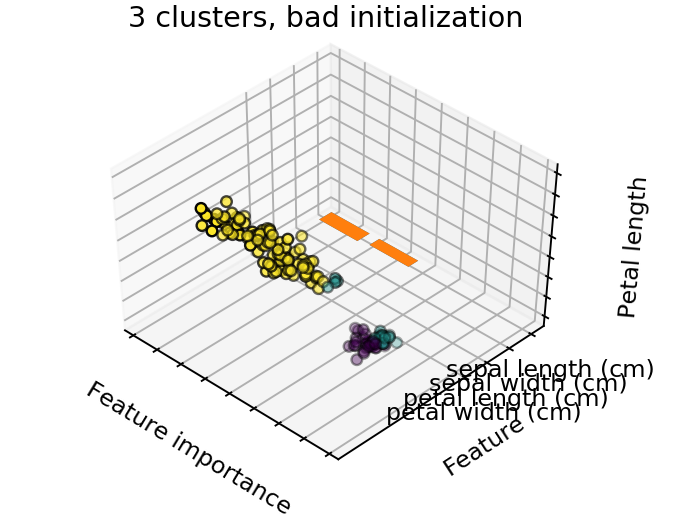

In [19]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    print(name)
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# for name, label in [('Setosa', 0),
#                     ('Versicolour', 1),
#                     ('Virginica', 2)]:
#     ax.text3D(X[y == label, 3].mean(),
#               X[y == label, 0].mean(),
#               X[y == label, 2].mean() + 2, name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y_ = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y_, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Petal width')
# ax.set_ylabel('Sepal length')
# ax.set_zlabel('Petal length')
# ax.set_title('Ground Truth')
# ax.dist = 12

fig.show()

## Supervised ML

### k-nearest neighbors

The 'model' stores the training dataset and calculates the shortest distance to the k nearest neighbors for any prediction dataset.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

1.0
0.973684210526


In [41]:
# do some prediction
sepal_length = 5
sepal_width = 2.9
petal_length = 1
petal_width = 0.2

X_pred = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

prediction = knn.predict(X_pred) #X_test

prediction = knn.predict(X_test) #X_test

print(prediction)
print(iris['target_names'][prediction])
print(iris['target_names'][y_test])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor']


## Decision tree

- Decision trees learn a hierachy of if/else questions leading to a decision based on the best test results
- Decision trees can be easly visualized
- tend to overfit and highly depend on pre-pruning
- important parameter: max_depth for pre_pruning

### forests

- idea: use many trees, each one a bit different and generalizing well in parts of the data
- randomness needs to be implemented by 'bootstrapping'

- **bootstrap sampling**: take n random samples from your dataset X with n samples (with replacement)

- at each node the algorithm randomly selects only a few features to find the best test result
- important additional (!) parameters: 
    - max_features (low = different trees, high = similar trees)
    - n_estimators sets the number of trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0, max_depth=2) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.964285714286
0.894736842105


In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=False, filled=True)

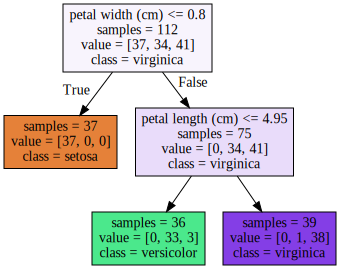

In [24]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [28]:
def  plot_feature_importance_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importance_iris(tree)

TypeError: bar() missing 1 required positional argument: 'left'

In [73]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2) # max_features=2, max_depth=2,
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.964285714286
0.947368421053


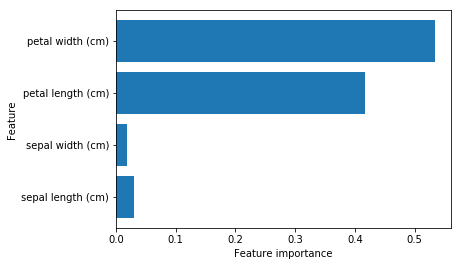

In [176]:
plot_feature_importance_iris(forest)

### Neural Networks

Multi-layer perceptron with each perceptron having a linear regressor

variables to set: 
    - number of layer
    - size of layer
    - activation function
    - solver
    
**solver**: calculates the weights in the linear part

**activation function**: takes the output from the solver and 'adds' a non-linearity

- input = a -> a = w_i*x_i -> act_func(a) = h_1 -> h_1 = output

- input = h_1 = a -> ... -> ...

In [201]:
# Neural Network
import mglearn
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0) #, hidden_layer_sizes = [1,1], activation='tanh')
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.973684210526
